Error is  inf
Error is  nan
Error is  nan
Error is  nan
Error is  nan
Error is  nan
Error is  inf
Error is  nan
Error is  nan
Error is  nan
Error is  nan
Error is  nan
Error is  inf
Error is  nan
Error is  nan
Error is  nan
Error is  nan
Error is  nan
Error is  2.813399890540392e+36
Error is  7.85179825457664e+111
Error is  inf
Error is  nan
Error is  nan
Error is  nan
Error is  2.193346917826633
Error is  0.7664188988927851
Error is  1.3615743118241843
Error is  0.4504591827596274
Error is  0.06819548819458371
Error is  0.11156918947607412
Error is  0.0030617861705173033
Error is  0.0009232259007720552
Error is  0.00011166275038436603
Error is  2.1455234934530356e-06
Error is  1.7757052503946254e-07
Error is  2.3661076962054347e-07
Error is  0.0003216104048315368
Error is  1.3728588115782897e-05
Error is  4.7095178285016525e-07
Error is  9.731741166962724e-08
Error is  2.470611861436603e-08
Error is  1.1080275645019016e-09
Error is  1.4969024119686444e-05
Error is  1.2613164793594254e

C:\Users\nickh\AppData\Local\Temp\ipykernel_18584\2861189765.py:12: RuntimeWarning: overflow encountered in scalar power
  fx = 1 - (b + 1) * r[0] + a * r[0]**2 * r[1]
C:\Users\nickh\AppData\Local\Temp\ipykernel_18584\2861189765.py:13: RuntimeWarning: overflow encountered in scalar power
  fy = b * r[0] - a * r[0]**2 * r[1]
C:\Users\nickh\AppData\Local\Temp\ipykernel_18584\2861189765.py:30: RuntimeWarning: invalid value encountered in add
  R_n1 = 0.5 * (r1 + r2 + 0.5 * h * f(r2))
C:\Users\nickh\AppData\Local\Temp\ipykernel_18584\2861189765.py:12: RuntimeWarning: overflow encountered in scalar multiply
  fx = 1 - (b + 1) * r[0] + a * r[0]**2 * r[1]
C:\Users\nickh\AppData\Local\Temp\ipykernel_18584\2861189765.py:13: RuntimeWarning: overflow encountered in scalar multiply
  fy = b * r[0] - a * r[0]**2 * r[1]
C:\Users\nickh\AppData\Local\Temp\ipykernel_18584\2861189765.py:56: RuntimeWarning: overflow encountered in square
  error = np.sqrt(np.sum(epsilon**2))
C:\Users\nickh\AppData\Local\

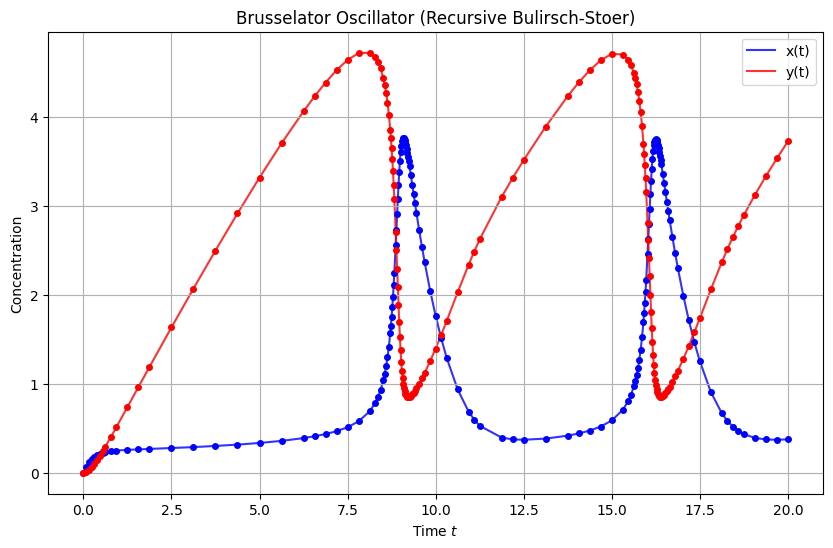

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 1.0
b = 3.0
delta = 1e-10
n_max = 8

def f(r):
    
    fx = 1 - (b + 1) * r[0] + a * r[0]**2 * r[1]
    fy = b * r[0] - a * r[0]**2 * r[1]
    
    return np.array([fx, fy], float)

def modified_midpoint(r0, t0, H, n):

    h = H / n

    r1 = r0 + 0.5 * h * f(r0)
    r2 = r0 + h * f(r1)
    
    for i in range(n - 1):
        r1_new = r1 + h * f(r2) 
        r2_new = r2 + h * f(r1_new)
        
        r1, r2 = r1_new, r2_new
        
    R_n1 = 0.5 * (r1 + r2 + 0.5 * h * f(r2))
    return R_n1

def step(r_start, t_start, H, t_list, r_list):

    is_converged = False
    
    R1 = {} 
    R2 = {}
    
    for n in range(1, n_max + 1): 
        
        R_n_1 = modified_midpoint(r_start, t_start, H, n)
        
        R2 = dict(R1) 
        R1 = {}
        R1[0] = R_n_1 

        if n==1:
            continue
        
        for m in range(1, n):
            epsilon = (R1[m - 1] - R2[m - 1]) / ( (n / (n - 1))**(2 * m) - 1 )
            R1[m] = R1[m - 1] + epsilon

        if n > 2:
            error = np.sqrt(np.sum(epsilon**2))
            print("Error is ", error)
            if error < H * delta:
                is_converged = True
                r_final = R1[n-1] 
                break
    
    
    if is_converged:
        t_list.append(t_start + H)
        r_list.append(r_final)
    else:
        step(r_start, t_start, H / 2.0, t_list, r_list)
        
        step(r_list[-1], t_list[-1], H / 2.0, t_list, r_list)


t_start = 0.0
t_end = 20.0
r_initial = np.array([0.0, 0.0], float)
H_initial = 20.0 

t_solution = [t_start]
r_solution = [r_initial]

t_current = t_start
while t_current < t_end:
    H = H_initial
    
    if t_current + H > t_end:
        H = t_end - t_current
    

    step(r_solution[-1], t_current, H, t_solution, r_solution)
    
    t_current = t_solution[-1]

x_solution = [r[0] for r in r_solution]
y_solution = [r[1] for r in r_solution]

plt.figure(figsize=(10, 6))
plt.plot(t_solution, x_solution, label='x(t)', color='blue', alpha=0.8, zorder=1)
plt.plot(t_solution, y_solution, label='y(t)', color='red', alpha=0.8, zorder=1)
plt.plot(t_solution, x_solution, 'bo', markersize=4, zorder=2)
plt.plot(t_solution, y_solution, 'ro', markersize=4, zorder=2)

plt.xlabel("Time $t$")
plt.ylabel("Concentration")
plt.title("Brusselator Oscillator (Recursive Bulirsch-Stoer)")
plt.legend()
plt.grid(True)
plt.show()